# Fashion MNIST 데이터셋 불러오기

## 필요한 package import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


## 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기

In [3]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## 데이터 확인

In [4]:
print(set(train_Y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


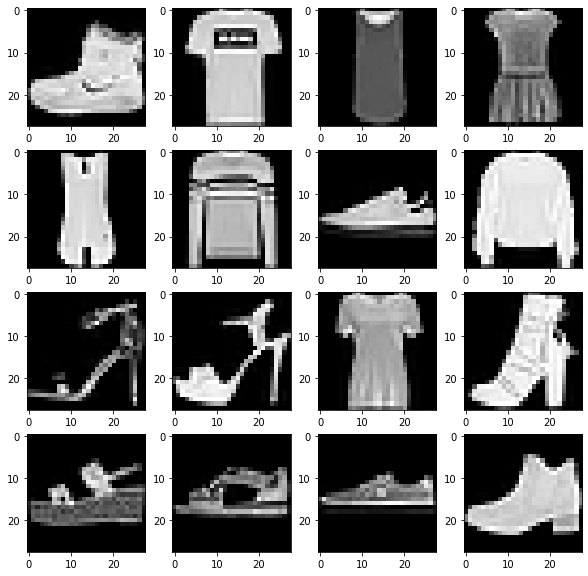

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [5]:
plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

print(train_Y[:16])

# (직접 해보기) 모델 정의 및 컴파일

CNN 모델 구성
- 사용 layer 및 optimizer, loss는 각자 알아서 구성해 볼 것
1. `tf.keras.Sequential`을 사용하여 모델 정의
1. 모델 컴파일
1. 모델 요약 출력

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [7]:
model = tf.keras.Sequential([
    # TODO - define model layers
    Conv2D(16, 3, padding='valid', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    Conv2D(32, 3, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    Conv2D(64, 3, padding='valid', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [8]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


## 모델 학습 & loss 그래프 생성

In [9]:
history = model.fit(train_X, train_Y, epochs=5, validation_split=0.25)


Epoch 1/5
1407/1407 [==============================] - 12s 4ms/step - loss: 0.8448 - accuracy: 0.6890 - val_loss: 0.4279 - val_accuracy: 0.8405
Epoch 2/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4250 - accuracy: 0.8475 - val_loss: 0.3498 - val_accuracy: 0.8714
Epoch 3/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3509 - accuracy: 0.8738 - val_loss: 0.3057 - val_accuracy: 0.8869
Epoch 4/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3075 - accuracy: 0.8888 - val_loss: 0.2905 - val_accuracy: 0.8928
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2808 - accuracy: 0.8985 - val_loss: 0.2868 - val_accuracy: 0.8940


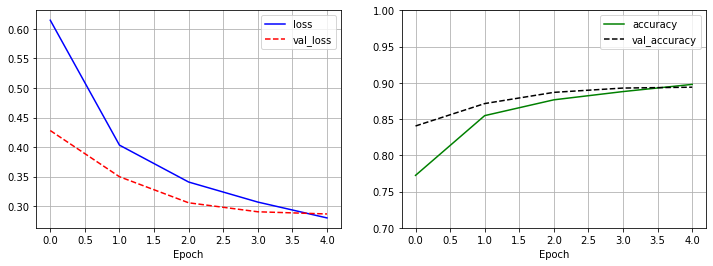

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.grid()
plt.show()
